# **Imports**

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
!pip install matplotlib==3.1.0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
import pickle
import seaborn as sns; sns.set()
from subprocess import check_output
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import OrthogonalMatchingPursuit,RANSACRegressor,LogisticRegression,ElasticNetCV,HuberRegressor, Ridge, Lasso,LassoCV,Lars,BayesianRidge,SGDClassifier,LogisticRegressionCV,RidgeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz 
from sklearn.tree import export_graphviz
from sklearn.neighbors import DistanceMetric
from scipy import stats
from sklearn.model_selection import cross_val_score

# **MID Project**

In [0]:
dataset = pd.read_csv(
    '/gdrive/My Drive/ML_Project/Posture Reconstruction/data/ConfLongDemo_JSI.csv',
    sep=',',
    names=["seq", "tag", "timestamp", "date", "x", "y", "z", "activity"])

In [0]:
# Encoding seq
dataset['seq'] = dataset['seq'].astype('category')
dataset['seq'] = dataset['seq'].cat.codes
# Encoding activity
dataset['activity'] = dataset['activity'].astype('category')
dataset['activity'] = dataset['activity'].cat.codes
# Encoding tag
dataset['tag'] = dataset['tag'].astype('category')
dataset['tag'] = dataset['tag'].cat.codes
# del dataset['timestamp']
#normalizing timestamp
dataset['timestamp'] = (dataset['timestamp'] -
                  dataset['timestamp'].mean()) / dataset['timestamp'].std()

# normalizing seq
dataset['seq'] = (dataset['seq'] -
                  dataset['seq'].mean()) / dataset['seq'].std()
# normalizing tag
dataset['tag'] = (dataset['tag'] -
                  dataset['tag'].mean()) / dataset['tag'].std()
# normalizing x
dataset['x'] = (dataset['x'] - dataset['x'].mean()) / dataset['x'].std()
# normalizing y
dataset['y'] = (dataset['y'] - dataset['y'].mean()) / dataset['y'].std()
# normalizing z
dataset['z'] = (dataset['z'] - dataset['z'].mean()) / dataset['z'].std()

print(dataset)

             seq       tag  timestamp  ...         y         z  activity
0      -1.774225 -1.302171   0.525583  ...  0.412769  0.235318        10
1      -1.774225  1.427813   0.525593  ...  0.177858  2.443221        10
2      -1.774225  0.517818   0.525597  ...  0.273506  1.452321        10
3      -1.774225 -1.302171   0.525602  ...  0.386521  0.128646        10
4      -1.774225 -0.392177   0.525607  ...  0.792755  0.184251        10
...          ...       ...        ...  ...       ...       ...       ...
164855  1.501425 -0.392177  -0.917507  ...  0.733890 -0.937181        10
164856  1.501425 -1.302171  -0.917503  ...  0.649793 -0.060796        10
164857  1.501425  1.427813  -0.917498  ...  0.461913  2.465883        10
164858  1.501425 -0.392177  -0.917488  ...  0.494516 -0.957927        10
164859  1.501425 -1.302171  -0.917483  ...  0.512274 -0.140938        10

[164860 rows x 8 columns]


In [0]:
s = dataset['date']
print(s,type(s))
s = s.tolist()
# this proves that date is same. only time differs
print(len(s))
r = ''
for i in range(len(s)):
    r = (s[i].split())[1]
    r = r.split(':')
    t = r[0]+r[1]+r[2]+r[3]
    s[i] = int(t)
del dataset['date']
dataset['date'] = s
dataset['date'] = (dataset['date'] - dataset['date'].mean()) / dataset['date'].std()

0         27.05.2009 14:03:25:127
1         27.05.2009 14:03:25:183
2         27.05.2009 14:03:25:210
3         27.05.2009 14:03:25:237
4         27.05.2009 14:03:25:263
                   ...           
164855    27.05.2009 11:50:41:957
164856    27.05.2009 11:50:41:983
164857    27.05.2009 11:50:42:010
164858    27.05.2009 11:50:42:063
164859    27.05.2009 11:50:42:090
Name: date, Length: 164860, dtype: object <class 'pandas.core.series.Series'>
164860


In [0]:
print(dataset)
target = dataset['activity']
del dataset['activity']

             seq       tag  timestamp  ...         z  activity      date
0      -1.774225 -1.302171   0.525583  ...  0.235318        10  0.634624
1      -1.774225  1.427813   0.525593  ...  2.443221        10  0.634628
2      -1.774225  0.517818   0.525597  ...  1.452321        10  0.634630
3      -1.774225 -1.302171   0.525602  ...  0.128646        10  0.634631
4      -1.774225 -0.392177   0.525607  ...  0.184251        10  0.634633
...          ...       ...        ...  ...       ...       ...       ...
164855  1.501425 -0.392177  -0.917507  ... -0.937181        10 -1.046730
164856  1.501425 -1.302171  -0.917503  ... -0.060796        10 -1.046729
164857  1.501425  1.427813  -0.917498  ...  2.465883        10 -1.046727
164858  1.501425 -0.392177  -0.917488  ... -0.957927        10 -1.046723
164859  1.501425 -1.302171  -0.917483  ... -0.140938        10 -1.046722

[164860 rows x 8 columns]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.25, random_state=0)

In [0]:
clf = LogisticRegression(penalty='l2', solver='saga',multi_class='multinomial')

In [0]:
clf.fit(x_train,y_train)
dbfile = open('/gdrive/My Drive/ML_Project/LogisticRegression_l2_saga', 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

In [0]:
target_names = []
for i in range(11):
    target_names.append(str(i))

In [0]:
score = clf.score(x_test,y_test)
print(score)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4087346839742812
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   387     0     0   191     0    21     0     0     0   144]
 [    1 10694     2   267   796     0   466     0     0     0  1325]
 [    0  1067     0    29   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
clf = LogisticRegression(penalty='l2', solver='liblinear',multi_class='ovr')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)
dbfile = open('/gdrive/My Drive/ML_Project/LogisticRegression_l2_liblinear', 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4059929637267985
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.83      0.54     13551
           2       0.00      0.00      0.00      1529
           3       0.30      0.13      0.18      1299
           4       0.41      0.18      0.25      6781
           5       0.00      0.00      0.00       419
           6       0.43      0.07      0.12      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.42      0.46      0.44      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.15      0.14     41215
weighted avg       0.32      0.41      0.32     41215


 [[    0   408     0     0   157     0     8     0     0     0   170]
 [    0 11292     0   206   660     0   227     0     0     0  1166]
 [    0  1123     0    19   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


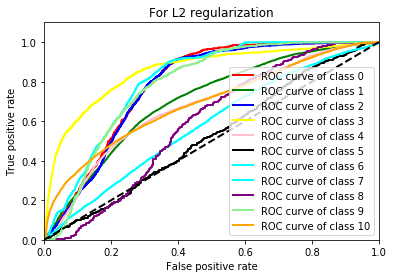

In [0]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",multi_class="ovr")
y = label_binarize(y_train,classes=range(11))
y_t = label_binarize(y_test,classes=range(11))
out = OneVsRestClassifier(logreg).fit(x_train,y_train).decision_function(x_test)


# In[30]:


fpr= dict()
tpr = dict()
roc_auc = dict()
for i in range(11):
    fpr[i],tpr[i],t = roc_curve(y_t[:,i],out[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen","orange"]
for i,c in zip(range(11),col):
    plt.plot(fpr[i],tpr[i],color=c,lw=2,label=("ROC curve of class "+str(i)))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('For L2 regularization')
plt.legend(loc="lower right")
plt.show()



In [0]:
clf = LogisticRegression(penalty='l2', solver='newton-cg',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)
dbfile = open('/gdrive/My Drive/ML_Project/LogisticRegression_l2_newton-cg', 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)
X_train = x_train

0.4087346839742812
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   387     0     0   191     0    21     0     0     0   144]
 [    1 10694     2   267   796     0   466     0     0     0  1325]
 [    0  1067     0    29   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
clf = LogisticRegression(penalty='l2', solver='lbfgs',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)
dbfile = open('/gdrive/My Drive/ML_Project/LogisticRegression_l2_lbfgs', 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4089773140846779
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.44      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   384     0     0   194     0    21     0     0     0   144]
 [    1 10691     2   270   796     0   473     0     0     0  1318]
 [    0  1069     0    28   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# Now decision tree
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=100)
decision_tree = decision_tree.fit(x_train, y_train)
dbfile = open('/gdrive/My Drive/ML_Project/decision_tree', 'ab')
pickle.dump(decision_tree, dbfile)                      
dbfile.close()

In [0]:
r = export_text(decision_tree)
print(r)

|--- feature_5 <= 0.70
|   |--- feature_4 <= 1.07
|   |   |--- feature_3 <= 1.28
|   |   |   |--- feature_3 <= 0.15
|   |   |   |   |--- feature_4 <= 0.52
|   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |--- feature_6 <= -1.05
|   |   |   |   |   |   |   |--- feature_4 <= -0.17
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.03
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.99
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.99
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.20
|   |   |   |   |   |   |   |   |   | 

In [0]:
print(decision_tree.score(x_test, y_test))


y_pred = clf.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred,target_names=target_names))
print("\n", c_matrix)

0.8474099235715152
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.44      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   384     0     0   194     0    21     0     0     0   144]
 [    1 10691     2   270   796     0   473     0     0     0  1318]
 [    0  1069     0    28   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# Now random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=100,random_state=0)
clf.fit(x_train, y_train)
dbfile = open('/gdrive/My Drive/ML_Project/RandomForest', 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

In [0]:
print(clf.feature_importances_)

[0.05758435 0.06361654 0.17732016 0.20566844 0.1654153  0.15388208
 0.17651313]


In [0]:
print(clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.9173359213878443
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       743
           1       0.93      0.98      0.96     13551
           2       0.87      0.61      0.72      1529
           3       0.91      0.90      0.90      1299
           4       0.95      0.98      0.97      6781
           5       0.84      0.52      0.65       419
           6       0.97      0.98      0.98      2930
           7       0.87      0.81      0.84      4612
           8       0.92      0.67      0.78       351
           9       0.92      0.81      0.86       671
          10       0.88      0.94      0.91      8329

    accuracy                           0.92     41215
   macro avg       0.90      0.79      0.83     41215
weighted avg       0.92      0.92      0.91     41215


 [[  316   146     0     0    56     0    28    61     0     0   136]
 [   15 13321    34    30     8     1     2    91     0     2    47]
 [    0   202   934    56   

In [0]:
# Now SVM
clf = SVC(C=0.1, gamma='scale', kernel='rbf')
clf.fit(x_train, y_train) 

In [0]:
print(clf.score(x_test, y_test))

In [0]:
clf = SVC(C=0.1, gamma='scale', kernel='linear')
clf.fit(x_train, y_train)

In [0]:
print(clf.score(x_test, y_test))

In [0]:
clf = SVC(C=0.1, gamma='scale', degree=2, kernel='poly')
clf.fit(x_train, y_train)

In [0]:
print(clf.score(x_test, y_test))

In [0]:
clf = SVC(C=0.1, gamma='scale', degree=3, kernel='poly')
clf.fit(x_train, y_train)

In [0]:
print(clf.score(x_test, y_test))

In [0]:
clf = SVC(C=0.1, gamma='scale', kernel='sigmoid')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

In [0]:
for k in range(1,30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    score = metrics.accuracy_score(y_test,y_pred)
    print(k,score)

In [0]:
reg1 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), solver='sgd',learning_rate='constant', learning_rate_init=0.1, batch_size=128,verbose=True)
reg1.fit(x_train, y_train)
t = reg1.score(x_train,y_train)
tt = reg1.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [0]:
reg2 = MLPClassifier(hidden_layer_sizes=(256, 128, 64),verbose=True)
reg2.fit(x_train, y_train)
t = reg2.score(x_train,y_train)
tt = reg2.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [0]:
reg3 = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32),verbose=True, max_iter=500)
reg3.fit(x_train, y_train)
t = reg3.score(x_train,y_train)
tt = reg3.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [0]:
reg3 = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32,16),verbose=True, max_iter=500)
reg3.fit(x_train, y_train)
t = reg3.score(x_train,y_train)
tt = reg3.score(x_test, y_test)
print('Training accuracy:',t)
print('Testing accuracy:',tt)

In [0]:
print('Training accuracy:',t)
print('Testing accuracy:',tt)

# **FINAL Project**

In [31]:
train = pd.read_csv('/gdrive/My Drive/ML_Project/Posture Reconstruction/data/ConfLongDemo_JSI.csv')
train.columns = ['Sequence Name','tagID','Time stamp','Date','x coordinate','y coordinate','z coordinate','activity']
cp_train = train.copy()
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train[c].values)) 
        train[c] = lbl.transform(list(train[c].values))
print(train.head())

for c in cp_train.columns:
    if cp_train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(cp_train[c].values))
        cp_train[c] = lbl.fit_transform(list(cp_train[c].values))
print(cp_train)

   Sequence Name  tagID  ...  z coordinate  activity
0              0      3  ...      1.344495        10
1              0      2  ...      0.968821        10
2              0      0  ...      0.466983        10
3              0      1  ...      0.488065        10
4              0      3  ...      1.299996        10

[5 rows x 8 columns]
        Sequence Name  tagID  ...  z coordinate  activity
0                   0      3  ...      1.344495        10
1                   0      2  ...      0.968821        10
2                   0      0  ...      0.466983        10
3                   0      1  ...      0.488065        10
4                   0      3  ...      1.299996        10
...               ...    ...  ...           ...       ...
164854             24      1  ...      0.062902        10
164855             24      0  ...      0.395161        10
164856             24      3  ...      1.353087        10
164857             24      1  ...      0.055037        10
164858             24 

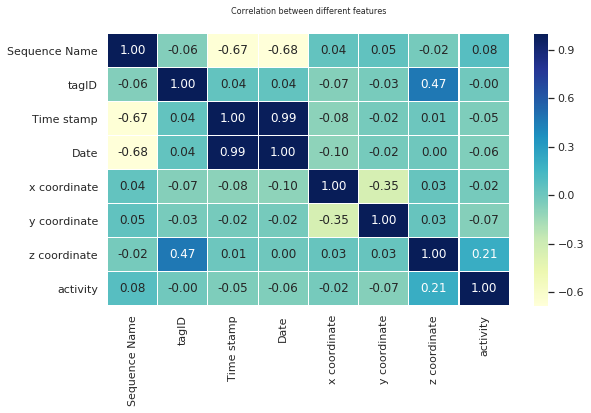

In [25]:
fig, ax = plt.subplots(figsize=(9,5))
plt.title('Correlation between different features',fontsize=8)
ax.title.set_position([0.5,1.05])
sns.heatmap(train.corr(),ax=ax,annot=True,linewidths=0.09,fmt='.2f',cmap="YlGnBu")
plt.show()

(11, 7)
activity                  0             1  ...             3             4
Sequence Name  1.391826e+01  1.241327e+01  ...  1.151977e+01  1.270658e+01
tagID          1.412714e+00  1.432397e+00  ...  1.447217e+00  1.438298e+00
Time stamp     6.337902e+17  6.337902e+17  ...  6.337902e+17  6.337902e+17
Date           7.650148e+04  8.497568e+04  ...  9.009761e+04  8.333538e+04
x coordinate   3.417612e+00  2.859681e+00  ...  1.897031e+00  2.856567e+00
y coordinate   1.343692e+00  1.806732e+00  ...  1.526687e+00  1.561189e+00
z coordinate   4.791489e-01  3.169376e-01  ...  1.146068e-01  5.306721e-01

[7 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


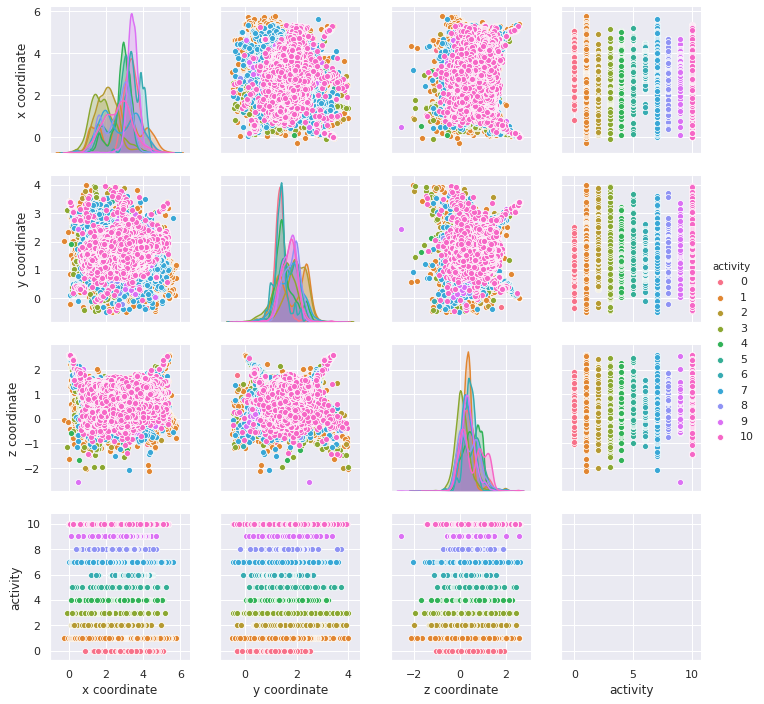

In [32]:
new_col= cp_train.groupby('activity').mean()
print(new_col.shape)
print(new_col.head().T)
cp_train=cp_train.fillna(0)
# Scatterplot Matrix
# Variables chosen from Random Forest modeling.
cols = ['x coordinate','y coordinate','z coordinate','activity']

sns.pairplot(cp_train[cols],
             diag_kind = 'kde',
             x_vars = cols,
             y_vars = cols,
             hue = 'activity', 
             )

In [0]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

n_col=36
X = X.drop(['Time stamp'], axis=1)
Y=train['activity']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [0]:
name = 'Decision Tree'
correct = 0
clf = DecisionTreeClassifier()
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/decision_tree', 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()


Decision Tree %error 14.4 rmsle 0.411429038431807
Decision Tree Confusion Matrix
[[  291    73     1     1    46     3    31    68     0     7    75]
 [   62 10274   134    41    47     5     5   333     6     6    85]
 [    3   159   706    27    13     5     2   169     2     3   151]
 [    2    48    43   878     9     2     0    37     1     2    31]
 [   42    36    13    10  5013    44    15    42    29    15   143]
 [    4     4     7     4    66   158     3     9    17     2    60]
 [   21     7     3     2    12     2  2152    21     0    49     6]
 [   69   356   171    41    43     9    29  2491     4    48   314]
 [    2     1     5     3    33    13     2     4   177     2    42]
 [    9    13     3     3     9     1    52    51     0   382    55]
 [   77    99   137    32   193    73    16   360    41    68  5541]]
--------------------------------------------------------------------------------
Decision Tree Classification Report
              precision    recall  f1-scor

In [0]:
r = export_text(clf)
print(r)

|--- feature_5 <= 0.69
|   |--- feature_4 <= 2.20
|   |   |--- feature_3 <= 3.98
|   |   |   |--- feature_3 <= 2.95
|   |   |   |   |--- feature_4 <= 1.94
|   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 42718.50
|   |   |   |   |   |   |   |--- feature_4 <= 1.62
|   |   |   |   |   |   |   |   |--- feature_3 <= 2.79
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.91
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 1.51
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  1.51
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_3 >  1.91
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 25368.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  25368.50
|   |   |   |   |   |   |   |   |  

[0.04918267 0.08377129 0.37304656 0.18880647 0.15764079 0.14755222]
Index(['Sequence Name', 'tagID', 'Date', 'x coordinate', 'y coordinate',
       'z coordinate', 'activity'],
      dtype='object')


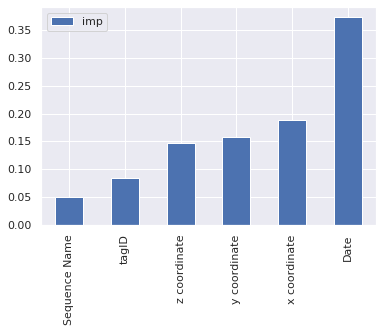

In [0]:
print(clf.feature_importances_)
label=train.columns
label = label.drop('Time stamp')
print(label)
label = label[:-1].values
imp = pd.DataFrame(clf.feature_importances_,index=label,columns=['imp'])
imp.sort_values(by='imp').plot(kind='bar')
plt.show()

In [0]:
name = 'RandomForestClassifier'
correct = 0
clf = RandomForestClassifier(n_estimators = 200)
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'ConfusionGridSearchCV Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

RandomForestClassifier %error 11.3 rmsle 0.3639602004079025
RandomForestClassifier ConfusionGridSearchCV Matrix
[[  179   145     0     0    55     0    31    64     0     1   121]
 [    8 10711    22    38    19     0     3   122     1     1    73]
 [    2   197   610    52     9     1     0   167     1     2   199]
 [    1    58    15   878     9     0     0    39     0     1    52]
 [    6    25     1     2  5230     9    12    16     2     0    99]
 [    1     6     3     1   102   118     1     3     5     0    94]
 [    4     4     0     0     9     0  2225     8     0    20     5]
 [   15   443    62    37    43     2    30  2538     1    18   386]
 [    0     1     1     0    62     3     1     4   139     1    72]
 [    0     2     0     3    11     0    53    31     0   410    68]
 [   16   126    39    11   128    11    10   183     6    20  6087]]
--------------------------------------------------------------------------------
RandomForestClassifier Classification Report
  

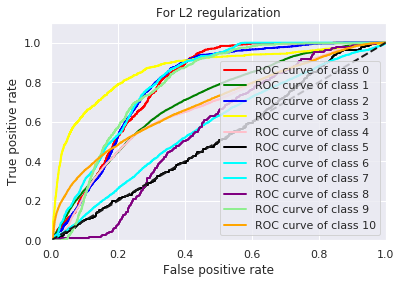

In [0]:
logreg = LogisticRegression(penalty="l1",solver="liblinear",multi_class="ovr")
y = label_binarize(y_train,classes=range(11))
y_t = label_binarize(y_test,classes=range(11))
out = OneVsRestClassifier(logreg).fit(X_train,y_train).decision_function(X_test)


fpr= dict()
tpr = dict()
roc_auc = dict()
for i in range(11):
    fpr[i],tpr[i],t = roc_curve(y_t[:,i],out[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen","orange"]
for i,c in zip(range(11),col):
    plt.plot(fpr[i],tpr[i],color=c,lw=2,label=("ROC curve of class "+str(i)))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('For L2 regularization')
plt.legend(loc="lower right")
plt.show()

In [0]:
name = 'ElasticNet'
correct = 0
clf = ElasticNetCV(cv=10, random_state=0)
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

ElasticNet %error 66.7 rmsle 0.7386866000548922
ElasticNet Confusion Matrix
[[   0    0    0    0  150  446    0    0    0    0    0]
 [   0    0    0    0 3434 7564    0    0    0    0    0]
 [   0    0    0    0  373  867    0    0    0    0    0]
 [   0    0    0    0  358  695    0    0    0    0    0]
 [   0    0    0    0 1700 3702    0    0    0    0    0]
 [   0    0    0    0  101  233    0    0    0    0    0]
 [   0    0    0    0  748 1527    0    0    0    0    0]
 [   0    0    0    0 1067 2508    0    0    0    0    0]
 [   0    0    0    0   79  205    0    0    0    0    0]
 [   0    0    0    0  185  393    0    0    0    0    0]
 [   0    0    0    0 1825 4812    0    0    0    0    0]]
--------------------------------------------------------------------------------
ElasticNet Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.00      0.00      0.00     10998
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
name = 'SVC'
correct = 0
clf = SVC()
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
name = 'KNN'
correct = 0
clf = KNeighborsClassifier(n_neighbors = 5)
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

KNN %error 0.5 rmsle 0.08176905246664552
KNN Confusion Matrix
[[  578     7     0     0     0     0     4     0     0     0     7]
 [    8 10963     6     5     0     0     0    16     0     0     0]
 [    0     5  1220     5     0     0     0     0     0     0    10]
 [    0     4     3  1046     0     0     0     0     0     0     0]
 [    4     0     0     0  5391     5     0     0     2     0     0]
 [    0     0     0     0     7   325     0     0     0     0     2]
 [    1     0     0     0     0     0  2273     0     0     1     0]
 [    0    16     0     0     0     0     0  3547     0     0    12]
 [    0     0     0     0     3     0     0     0   280     0     1]
 [    0     0     0     0     0     0     4     0     0   572     2]
 [    5     0    12     0     0     8     0    17     2     1  6592]]
--------------------------------------------------------------------------------
KNN Classification Report
              precision    recall  f1-score   support

           0    

In [0]:
name = 'GridSearchCV'
correct = 0
clf = GridSearchCV(SVC(),param_grid, refit = True, verbose = 1)
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [0]:
name = 'HubertRegressor'
correct = 0
clf = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100,epsilon=2.95)
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')


dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

HubertRegressor %error 66.7 rmsle 0.7295718280057876
HubertRegressor Confusion Matrix
[[   0    0   12  138  220  186   40    0    0    0    0]
 [   0    0  424 2878 3826 3057  813    0    0    0    0]
 [   0    0   27  301  427  374  111    0    0    0    0]
 [   0    0   41  325  348  286   53    0    0    0    0]
 [   0    0  199 1370 1880 1592  361    0    0    0    0]
 [   0    0   15   87   89  116   27    0    0    0    0]
 [   0    0  104  575  821  608  167    0    0    0    0]
 [   0    0   90  719 1331 1102  333    0    0    0    0]
 [   0    0    8   77   70  109   20    0    0    0    0]
 [   0    0   28  115  205  162   68    0    0    0    0]
 [   0    0  191 1360 2379 2234  473    0    0    0    0]]
--------------------------------------------------------------------------------
HubertRegressor Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.00      0.00      0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
name = 'Ridge'
correct = 0
clf = Ridge(fit_intercept=True, alpha=0.0, random_state=0, normalize=True)
regr=clf.fit(X_train,y_train)
print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

In [0]:
# Lasso
correct = 0
clf = Lasso(alpha=0.05)
regr=clf.fit(X_train,y_train)

print("Lasso",'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print("Lasso",'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) )
print(conf)

print('--'*40)

# Classification Report
print("Lasso",'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

In [0]:
# LassoCV
name = "LassoCV"
clf = LassoCV()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

In [0]:
# Lars
name = 'lars'
clf = Lars(n_nonzero_coefs=10)
correct = 0
regr=clf.fit(X_train,y_train)

print("Lars",'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print("Lars",'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
print('--'*40)

# Classification Report
print("Lars",'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

Lars %error 64.2 rmsle 0.7117869059238155
Lars Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    2   27  146  273  122   25    1    0    0
     0]
 [   0    1    3    4   27  100 1749 4946 3535  583   30    9    4    7
     0]
 [   0    0    0    1    1    7   63  521  485  133    9    8    1   10
     1]
 [   0    1    1    2    4   11  163  510  289   49   11    7    4    1
     0]
 [   0    0    0    0    1    9  183 1152 2486 1500   54   10    7    0
     0]
 [   0    0    0    0    0    2   25   96  156   45    4    4    1    0
     1]
 [   0    0    0    0    0    9   69  858 1307   30    1    1    0    0
     0]
 [   0    0    0    3    4   16  268 1616 1326  256   46    8    7   21
     4]
 [   0    0    0    0    0    1   20   77  148   34    2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:

name = "BayesianRidge"
clf = BayesianRidge()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

BayesianRidge %error 64.2 rmsle 0.7117897445432962
BayesianRidge Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    2   27  146  273  122   25    1    0    0
     0]
 [   0    1    3    4   27  100 1748 4947 3535  583   30    9    4    7
     0]
 [   0    0    0    1    1    7   62  522  485  133    9    8    1   11
     0]
 [   0    1    1    2    4   11  163  510  290   48   11    7    4    1
     0]
 [   0    0    0    0    1    9  183 1152 2486 1500   54   10    7    0
     0]
 [   0    0    0    0    0    2   25   96  156   45    4    4    1    0
     1]
 [   0    0    0    0    0    9   69  858 1307   30    1    1    0    0
     0]
 [   0    0    0    3    4   16  267 1617 1327  255   46    8    7   21
     4]
 [   0    0    0    0    0    1   20  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
# SGDClassifier
name = "SGDClassifier"
clf = SGDClassifier()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')


dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

SGDClassifier %error 86.4 rmsle 0.9611306852681245
SGDClassifier Confusion Matrix
[[   0    0    0    0    0    0    0  436    0    0  160]
 [   0    0    0    0    0    0    0 8950    0    0 2048]
 [   0    0    0    0    0    0    0  923    0    0  317]
 [   0    0    0    0    0    0    0  880    0    0  173]
 [   0    0    0    0    0    0    0 4156    0    0 1246]
 [   0    0    0    0    0    0    0  243    0    0   91]
 [   0    0    0    0    0    0    0 1823    0    0  452]
 [   0    0    0    0    0    0    0 2632    0    0  943]
 [   0    0    0    0    0    0    0  211    0    0   73]
 [   0    0    0    0    0    0    0  443    0    0  135]
 [   0    0    0    0    0    0    0 4758    0    0 1879]]
--------------------------------------------------------------------------------
SGDClassifier Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.00      0.00      0.00     10998

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# RidgeClassifier
name = "RidgeClassifier"
clf = RidgeClassifier()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

RidgeClassifier %error 71.0 rmsle 0.9589928712855943
RidgeClassifier Confusion Matrix
[[   0  351    0    0   59    0    0    0    0    0  186]
 [   0 9542    0    1  462    0    8    0    0    0  985]
 [   0  951    0    0   10    0    0    0    0    0  279]
 [   0  824    0    1   57    0    0    0    0    0  171]
 [   0 2635    0    0  618    0    0    0    0    0 2149]
 [   0  231    0    0   15    0    0    0    0    0   88]
 [   0 2037    0    0  132    0    0    0    0    0  106]
 [   0 2892    0    1  110    0    2    0    0    0  570]
 [   0  202    0    0    9    0    0    0    0    0   73]
 [   0  546    0    0    7    0    0    0    0    0   25]
 [   0 3367    0    0  105    0    0    0    0    0 3165]]
--------------------------------------------------------------------------------
RidgeClassifier Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.40      0.87      0.55    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# LogisticRegression
name = "LogisticRegression"
clf = LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr')
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)
    
print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')


dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

LogisticRegression %error 69.8 rmsle 0.9480415008237548
LogisticRegression Confusion Matrix
[[   0  340    0    0  109    0    6    0    0    0  141]
 [   0 9122    0  139  568    0  154    0    0    0 1015]
 [   0  905    0   14   10    0    0    0    0    0  311]
 [   0  738    0  118   37    0    0    0    0    0  160]
 [   0 2544    0    2  930    0    5    0    0    0 1921]
 [   0  217    0    2   28    0    0    0    0    0   87]
 [   0 1874    0    0  220    0   99    0    0    0   82]
 [   0 2778    0   50  123    0   28    0    0    0  596]
 [   0  194    0    0   14    0    0    0    0    0   76]
 [   0  536    0    0    9    0    5    0    0    0   28]
 [   0 3211    0   37  246    0    1    0    0    0 3142]]
--------------------------------------------------------------------------------
LogisticRegression Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.41      0.83     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# OrthogonalMatchingPursuit
name = "OrthogonalMatchingPursuit"
clf = OrthogonalMatchingPursuit()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

OrthogonalMatchingPursuit %error 65.2 rmsle 0.7259558746346754
OrthogonalMatchingPursuit Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1   11  257  225   98    4    0    0    0]
 [   0    2    2   13  228 5734 4798  188   29    3    1    0]
 [   0    0    0    2   31  571  526   86   18    6    0    0]
 [   0    1    0    3  141  704  176   21    6    1    0    0]
 [   0    0    0    1   90 1588 2669 1035   18    1    0    0]
 [   0    0    0    0   14  134  130   49    6    1    0    0]
 [   0    0    0    1   36  771 1443   23    1    0    0    0]
 [   0    0    1    4   79 1857 1371  213   28   21    1    0]
 [   0    0    0    0    7  129  110   36    2    0    0    0]
 [   1    0    0    0   20  273  254   29    1    0    0    0]
 [   0    0    0    3  166 2719 1519 2038  162    9   21    0]]
--------------------------------------------------------------------------------
OrthogonalMatchingPursuit Classification Report
        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
# RANSACRegressor()
name = "RANSACRegressor()"
clf = RANSACRegressor()
correct = 0
regr=clf.fit(X_train,y_train)

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

RANSACRegressor() %error 66.3 rmsle 0.8649812148980491
RANSACRegressor() Confusion Matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
name = 'MLP'
clf = MLPClassifier(hidden_layer_sizes=(256, 128 , 64, 32,16),verbose=True, max_iter=500,learning_rate='adaptive')
regr = clf.fit(X_train, y_train)
correct = 0

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = 4.81015010
Iteration 5, loss = 4.19319543
Iteration 6, loss = 2.40463683
Iteration 7, loss = 2.15126202
Iteration 8, loss = 2.40195536
Iteration 9, loss = 2.03704059
Iteration 10, loss = 1.94681317
Iteration 11, loss = 1.97614550
Iteration 12, loss = 1.89708260
Iteration 13, loss = inf
Iteration 14, loss = 2.32501735
Iteration 15, loss = 1.87789128
Iteration 16, loss = 1.87741524
Iteration 17, loss = 1.87740662
Iteration 18, loss = 1.87731908
Iteration 19, loss = 1.95930516
Iteration 20, loss = 1.87789159
Iteration 21, loss = 1.87796363
Iteration 22, loss = 1.87753540
Iteration 23, loss = 1.87739776
Iteration 24, loss = 1.87880683
Iteration 25, loss = 1.87751104
Iteration 26, loss = 1.87760650
Iteration 27, loss = 1.87756654
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP %error 78.8 rmsle 1.067959715586932
MLP Confusion Matrix
[[    0   596     0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.33      1.00      0.50     10998
           2       0.00      0.00      0.00      1240
           3       0.00      0.00      0.00      1053
           4       0.00      0.00      0.00      5402
           5       0.00      0.00      0.00       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       0.70      0.01      0.02      6637

    accuracy                           0.34     32972
   macro avg       0.09      0.09      0.05     32972
weighted avg       0.25      0.34      0.17     32972

--------------------------------------------------------------------------------
Accuracy 33.55 %


In [0]:
name = 'MLP'
clf = MLPClassifier(hidden_layer_sizes=(256,64,32,16),verbose=True, max_iter=500,learning_rate='adaptive')
regr = clf.fit(X_train, y_train)
correct = 0

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Iteration 1, loss = inf
Iteration 2, loss = 2.04986176
Iteration 3, loss = 1.93384839
Iteration 4, loss = 1.89288434
Iteration 5, loss = 1.88072145
Iteration 6, loss = 1.87538820
Iteration 7, loss = 1.87150097
Iteration 8, loss = 1.87074372
Iteration 9, loss = 1.86997842
Iteration 10, loss = inf
Iteration 11, loss = 1.87762553
Iteration 12, loss = 1.87674636
Iteration 13, loss = 1.87628035
Iteration 14, loss = 1.87359574
Iteration 15, loss = 1.87203578
Iteration 16, loss = 1.87322610
Iteration 17, loss = 1.87287249
Iteration 18, loss = 1.87433206
Iteration 19, loss = 1.87869690
Iteration 20, loss = 1.87772469
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP %error 78.8 rmsle 1.068496829021888
MLP Confusion Matrix
[[    0   596     0     0     0     0     0     0     0     0     0]
 [    0 10998     0     0     0     0     0     0     0     0     0]
 [    0  1240     0     0     0     0     0     0     0     0     0]
 [    0  1053     0     0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.33      1.00      0.50     10998
           2       0.00      0.00      0.00      1240
           3       0.00      0.00      0.00      1053
           4       0.00      0.00      0.00      5402
           5       0.00      0.00      0.00       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       1.00      0.01      0.02      6637

    accuracy                           0.34     32972
   macro avg       0.12      0.09      0.05     32972
weighted avg       0.31      0.34      0.17     32972

--------------------------------------------------------------------------------
Accuracy 33.52 %


In [0]:
name = 'MLP'
clf = MLPClassifier(hidden_layer_sizes=(256,64,32,16),verbose=True, max_iter=500,learning_rate='adaptive')
regr = clf.fit(X_train, y_train)
correct = 0

print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 2.11521727
Iteration 4, loss = 2.06750229
Iteration 5, loss = 1.91157029
Iteration 6, loss = 1.92351205
Iteration 7, loss = 1.87539357
Iteration 8, loss = 1.87125941
Iteration 9, loss = 1.86995195
Iteration 10, loss = 1.86940107
Iteration 11, loss = 1.86926973
Iteration 12, loss = 1.86940180
Iteration 13, loss = 1.86890781
Iteration 14, loss = 1.86884833
Iteration 15, loss = 1.86844385
Iteration 16, loss = 1.86886432
Iteration 17, loss = 1.86843194
Iteration 18, loss = 1.86827613
Iteration 19, loss = 1.86817083
Iteration 20, loss = 1.86814903
Iteration 21, loss = 1.86792460
Iteration 22, loss = 1.86837196
Iteration 23, loss = 1.86842274
Iteration 24, loss = 1.86828234
Iteration 25, loss = inf
Iteration 26, loss = 1.87787094
Iteration 27, loss = 1.87721922
Iteration 28, loss = 1.87256553
Iteration 29, loss = 1.86934507
Iteration 30, loss = 1.86930344
Iteration 31, loss = 1.86971766
Iteration 32, loss = 1.87011271
Traini

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       596
           1       0.34      1.00      0.50     10998
           2       0.00      0.00      0.00      1240
           3       0.00      0.00      0.00      1053
           4       0.77      0.03      0.05      5402
           5       1.00      0.01      0.02       334
           6       0.00      0.00      0.00      2275
           7       0.00      0.00      0.00      3575
           8       0.00      0.00      0.00       284
           9       0.00      0.00      0.00       578
          10       0.89      0.01      0.02      6637

    accuracy                           0.34     32972
   macro avg       0.27      0.10      0.05     32972
weighted avg       0.43      0.34      0.18     32972

--------------------------------------------------------------------------------
Accuracy 34.03 %


In [33]:
name = 'GradientBoostingClassifier'
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 250)
regr = clf.fit(X_train, y_train)
correct = 0



print(name,'%error',procenterror(regr.predict(X_test),y_test),'rmsle',rmsle(regr.predict(X_test),y_test))

# Confusion Matrix
print(name,'Confusion Matrix')
conf=confusion_matrix(y_test, np.round(regr.predict(X_test) ) ) 
print(conf)

print('--'*40)

# Classification Report
print(name,'Classification Report')
classif=classification_report(y_test,np.round( regr.predict(X_test) ) )
print(classif)


# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, np.round( regr.predict(X_test) ) ) * 100,2)
print('Accuracy', logreg_accuracy,'%')


dbfile = open('/gdrive/My Drive/ML_Project/pickle_models/'+name, 'ab')
pickle.dump(clf, dbfile)                      
dbfile.close()

NameError: ignored